In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
Ad_sales=pd.read_csv("advertising_sales.csv")
Ad_sales

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
Ad_sales_new=Ad_sales.drop(['Unnamed: 0'], axis = 1)

In [4]:
Ad_sales_new

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


Here the target variable is continuous, So we will use the Regression Analysis

In [5]:
Ad_sales_new.shape

(200, 4)

DataFrame is having 200 rows and 5 columns

In [6]:
Ad_sales_new.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

All the datatype is of float type 

In [7]:
Ad_sales_new.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

There is no null value in the DataFrame

In [8]:
Ad_sales_new.loc[Ad_sales["sales"]== " "]

,TV,radio,newspaper,sales


It means no empty value in the sales

# EDA ANALYSIS

## Univariate Analysis

### DistributionPlot

<AxesSubplot:xlabel='TV', ylabel='Density'>

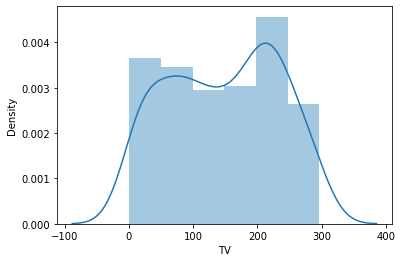

In [9]:
sns.distplot(Ad_sales_new["TV"])

Now looking at this we can say that TV sales lies between 0 and 300, 
with maximum value at 250.
The plot is looking uniform

<AxesSubplot:xlabel='radio', ylabel='Density'>

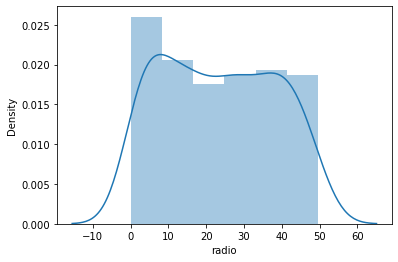

In [10]:
sns.distplot(Ad_sales_new["radio"])

Now looking at this we can say that radio sales lies between 0 and 50, 
with maximum value at 5 approximately.
The plot is uniform

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

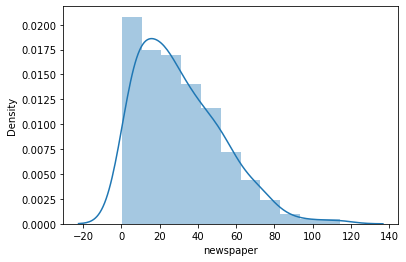

In [11]:
sns.distplot(Ad_sales_new["newspaper"])

Now looking at this we can say that newspaper sales lies between 0 and 110, 
with maximum value at 10 approximately.
The plot is skewed, it is positively skewed

<AxesSubplot:xlabel='sales', ylabel='Density'>

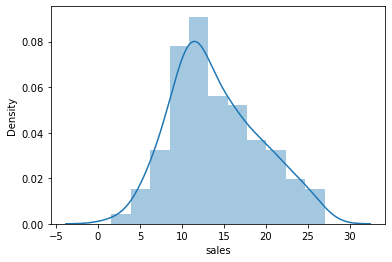

In [12]:
sns.distplot(Ad_sales_new["sales"])

Now looking at this we can say that newspaper sales lies between 0 and 30, 
with maximum value at 12 approximately.
The plot is skewed, it is positively skewed

### Outliers Checking

<AxesSubplot:xlabel='TV'>

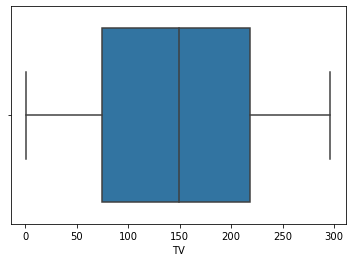

In [13]:
sns.boxplot(Ad_sales_new["TV"])

<AxesSubplot:xlabel='radio'>

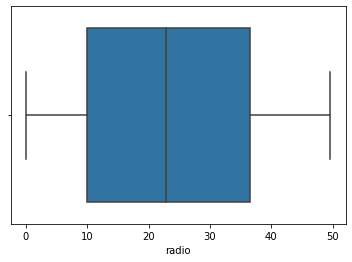

In [14]:
sns.boxplot(Ad_sales_new["radio"])

<AxesSubplot:xlabel='newspaper'>

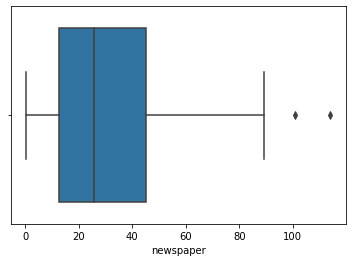

In [15]:
sns.boxplot(Ad_sales_new["newspaper"])

<AxesSubplot:xlabel='sales'>

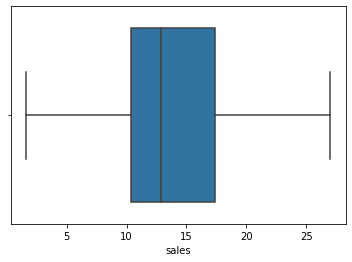

In [16]:
sns.boxplot(Ad_sales_new["sales"])

We can see outliers in the newspaper column only

## Bivariate Analysis


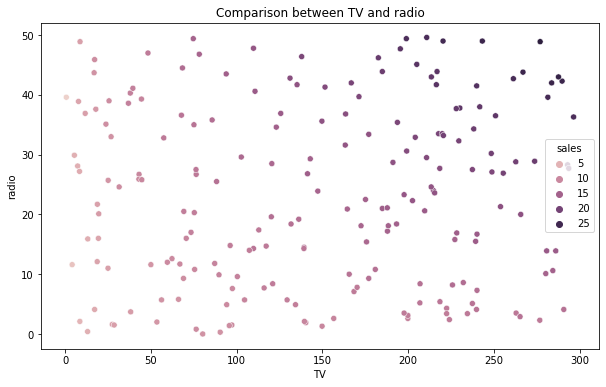

In [17]:
plt.figure(figsize=[10,6])
plt.title('Comparison between TV and radio')
sns.scatterplot(Ad_sales_new['TV'], Ad_sales_new["radio"], hue=Ad_sales_new["sales"]);

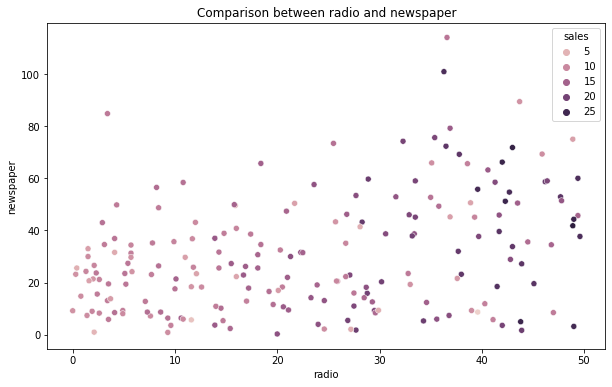

In [18]:
plt.figure(figsize=[10,6])
plt.title('Comparison between radio and newspaper')
sns.scatterplot(Ad_sales_new["radio"], Ad_sales_new["newspaper"], hue=Ad_sales_new["sales"]);

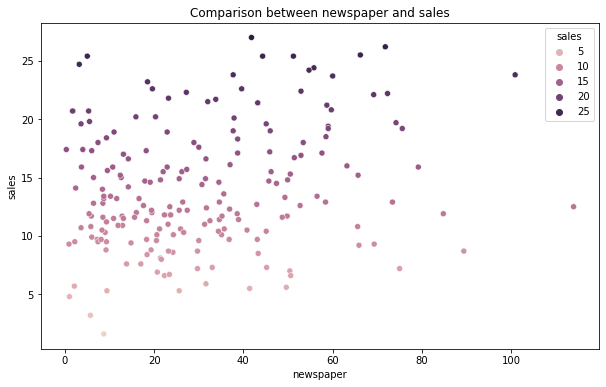

In [19]:
plt.figure(figsize=[10,6])
plt.title('Comparison between newspaper and sales')
sns.scatterplot(Ad_sales_new['newspaper'], Ad_sales_new["sales"], hue=Ad_sales_new["sales"]);

From the scatterplot, we cannot find any correlation between the column's data

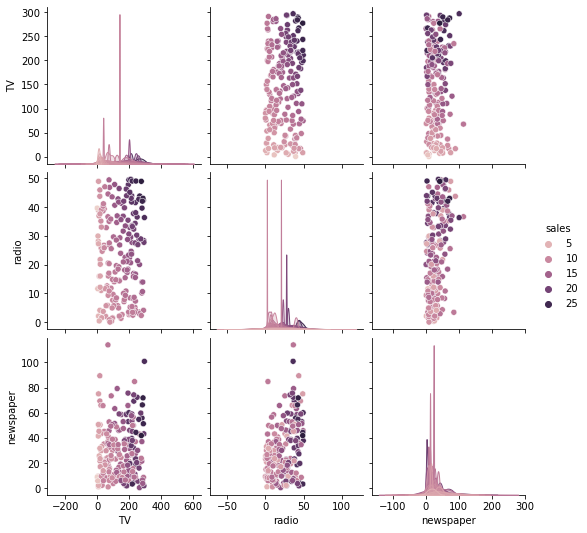

In [20]:
sns.pairplot(Ad_sales_new,hue="sales") 

In [21]:
Ad_sales_new.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


From the table we can observe that mean and standard deviation for the TV column is highest of all columns.

Minimum value for TV is 0.7 and maximum is 296.4

Minimum value for radio is 0 and maximum is 49

Minimum value for newspaper is 0.3 and maximum is 114

Minimum value for radio is 1.6 and maximum is 27

The difference between minimum value and 50 percentile is very huge in all cases.

## Multivariate Analysis

In [22]:
cor=Ad_sales_new.corr()
cor

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


From correlation table we can observe that

positive correaltion can be seen between TV and sales columns with value=0.78

and radio and sales with value=0.58



<AxesSubplot:>

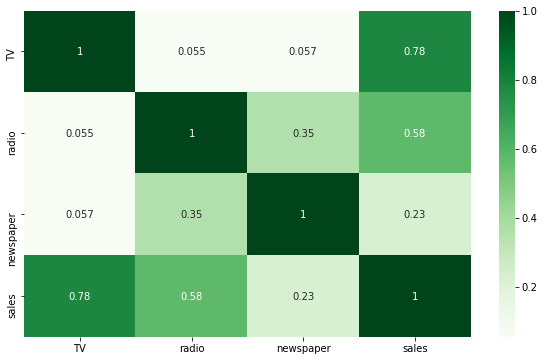

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(cor,cmap='Greens',annot=True)

Same correlation can be found in the heatmap like correlation table

## Z-Score for outlier-removal

In [24]:
from scipy.stats import zscore
z=np.abs(zscore(Ad_sales_new))
Adsales=Ad_sales_new[(z<3).all(axis=1)]

In [25]:
Adsales.shape

(198, 4)

In [26]:
Ad_sales_new.shape

(200, 4)

In [27]:
2/200

0.01

So the new DataFrame after outlier removal is acceptable (less than 0.05)

## Checking for Skewness

In [28]:
Adsales.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

Here we can see that only newspaper column having positive skewness more than 0.5.

So we will remove skewness form that column.

### Skewness removal using Power_Transform method


In [29]:
x=Adsales.iloc[:,:-1]
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [30]:
y=Adsales.iloc[:,-1]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 198, dtype: float64

In [31]:
from sklearn.preprocessing import power_transform
X=power_transform(x, method='yeo-johnson')
X

array([[ 0.95598306,  0.9691098 ,  1.6041965 ],
       [-1.19200349,  1.04623436,  0.83104401],
       [-1.6461253 ,  1.37296802,  1.60705249],
       [ 0.14293428,  1.1473316 ,  1.28376774],
       [ 0.45645241, -0.73502642,  1.28062154],
       [-1.8204008 ,  1.51543955,  1.76610727],
       [-1.00349358,  0.70309642, -0.10205346],
       [-0.20996049, -0.0876566 , -0.84968895],
       [-1.82264543, -1.62948287, -2.09866461],
       [ 0.652694  , -1.56152179, -0.22649933],
       [-0.88482761, -1.19258569, -0.06553382],
       [ 0.80322028,  0.19357553, -1.59608414],
       [-1.52567125,  0.82725998,  1.50859232],
       [-0.48090308, -1.01613619, -1.23269654],
       [ 0.69642374,  0.70856268,  0.86367455],
       [ 0.60769456,  1.45886692,  1.1026083 ],
       [ 1.44702338,  1.06152278,  1.19771741],
       [-0.84304109, -0.02834315, -0.39458775],
       [ 0.09676151,  0.18741189, -0.346834  ],
       [ 0.84017479,  0.41523303,  1.11921444],
       [ 1.02746612, -1.2660875 , -0.102

In [32]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
xtrain=SC.fit_transform(X)
xtrain

array([[ 0.95598306,  0.9691098 ,  1.6041965 ],
       [-1.19200349,  1.04623436,  0.83104401],
       [-1.6461253 ,  1.37296802,  1.60705249],
       [ 0.14293428,  1.1473316 ,  1.28376774],
       [ 0.45645241, -0.73502642,  1.28062154],
       [-1.8204008 ,  1.51543955,  1.76610727],
       [-1.00349358,  0.70309642, -0.10205346],
       [-0.20996049, -0.0876566 , -0.84968895],
       [-1.82264543, -1.62948287, -2.09866461],
       [ 0.652694  , -1.56152179, -0.22649933],
       [-0.88482761, -1.19258569, -0.06553382],
       [ 0.80322028,  0.19357553, -1.59608414],
       [-1.52567125,  0.82725998,  1.50859232],
       [-0.48090308, -1.01613619, -1.23269654],
       [ 0.69642374,  0.70856268,  0.86367455],
       [ 0.60769456,  1.45886692,  1.1026083 ],
       [ 1.44702338,  1.06152278,  1.19771741],
       [-0.84304109, -0.02834315, -0.39458775],
       [ 0.09676151,  0.18741189, -0.346834  ],
       [ 0.84017479,  0.41523303,  1.11921444],
       [ 1.02746612, -1.2660875 , -0.102

In [33]:
ytrain=y

# train_test_split


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [35]:
for i in range(200):
    x_train, x_test, y_train, y_test=train_test_split(xtrain,ytrain,test_size=0.30, random_state=i)
    from sklearn.tree import DecisionTreeRegressor
    DTR=DecisionTreeRegressor()
    DTR.fit(x_train,y_train)
    pred=DTR.predict(x_test)
    
    print("r2score at random state",i,"is",r2_score(y_test,pred))
    print('error:')
    print('Mean absolute error :', mean_absolute_error(y_test,pred))
    print('Mean squared error :', mean_squared_error(y_test,pred))
    print('Root mean Squared Error :', np.sqrt(mean_squared_error(y_test,pred)))

r2score at random state 0 is 0.96166861872775
error:
Mean absolute error : 0.8800000000000002
Mean squared error : 1.1270000000000004
Root mean Squared Error : 1.0616025621672174
r2score at random state 1 is 0.9446722166199264
error:
Mean absolute error : 0.9366666666666668
Mean squared error : 1.5033333333333334
Root mean Squared Error : 1.226104943849968
r2score at random state 2 is 0.9373295799605216
error:
Mean absolute error : 1.0799999999999998
Mean squared error : 1.9239999999999997
Root mean Squared Error : 1.387083270751976
r2score at random state 3 is 0.9522208865169486
error:
Mean absolute error : 0.9600000000000002
Mean squared error : 1.5773333333333333
Root mean Squared Error : 1.2559193180030845
r2score at random state 4 is 0.9542886568252393
error:
Mean absolute error : 0.7083333333333334
Mean squared error : 0.9498333333333334
Root mean Squared Error : 0.9745939325346394
r2score at random state 5 is 0.9618098893364724
error:
Mean absolute error : 0.7483333333333334
Mea

In [36]:
from sklearn.tree import DecisionTreeRegressor
maxr2=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test=train_test_split(xtrain,ytrain,test_size=0.30, random_state=i)
    mod=DecisionTreeRegressor()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    r2=r2_score(y_test,pred)
    if r2>maxr2:
        maxr2=r2
        maxRS=i
print("Best accuracy is ", maxr2, "on Random_state", maxRS)

Best accuracy is  0.9755189435294972 on Random_state 155


In [37]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.30, random_state=55)


#### Now checking for r2_score using 5 algorithms

In [38]:
from sklearn.svm import SVR
SV=SVR(kernel="linear")
SV.fit(x_train,y_train)
SV.score(x_train,y_train)
pred_y=SV.predict(x_test)
print(SV.score(x_train,y_train))

0.8811593647370797


In [39]:
from sklearn.ensemble import RandomForestRegressor
RFReg = RandomForestRegressor(max_depth=2, random_state=0)
RFReg.fit(x_train, y_train)
pred=(RFReg.predict(x_test))
print(RFReg.score(x_test,pred))

1.0


In [40]:
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred=DTR.predict(x_test)
print(r2_score(y_test,pred))

0.9725675436277152


In [41]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.01)
#enr=ElasticNet()
enr.fit(x_train,y_train)
Enrpred=enr.predict(x_test)
print(enr.score(x_test,Enrpred))
enr.coef_

1.0


array([ 0.04649797,  0.18649884, -0.00780111])

In [42]:
import numpy as np
from sklearn.linear_model import LinearRegression
REG = LinearRegression()
REG.fit(x_train, y_train)
REG.score(x_train, y_train)

0.88947472491047

### Now checking cross_validation_score

In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
print(cross_val_score(SV,xtrain,ytrain,cv=5).mean())

0.888479495369505


In [45]:
print(cross_val_score(RFReg,xtrain,ytrain,cv=5).mean())

0.8297024752569003


In [46]:
print(cross_val_score(DTR,xtrain,ytrain,cv=5).mean())

0.9476950105020426


In [47]:
print(cross_val_score(enr,xtrain,ytrain,cv=5).mean())

0.8959707112986228


In [48]:
print(cross_val_score(REG,xtrain,ytrain,cv=5).mean())

0.8958270968555071


The model showing least difference between two models is LinearRegression.


We have chosen LinearRegression as our best model.

# Hyper parameter tuning

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
parameter ={ 'fit_intercept' : np.arange(1,5),
           'copy_X' : np.arange(1,5),
           'n_jobs' : np.arange(1,8),
           'positive' : np.arange(1,6)}

In [51]:
GCV=GridSearchCV(LinearRegression(),parameter,cv=5)

In [52]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': array([1, 2, 3, 4]),
                         'fit_intercept': array([1, 2, 3, 4]),
                         'n_jobs': array([1, 2, 3, 4, 5, 6, 7]),
                         'positive': array([1, 2, 3, 4, 5])})

In [53]:
GCV.best_params_

{'copy_X': 1, 'fit_intercept': 1, 'n_jobs': 1, 'positive': 1}

In [54]:
Final_model= LinearRegression(copy_X = 1, fit_intercept =1, n_jobs=1, positive=1)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
r2score=r2_score(y_test,pred)
print(r2score*100)

90.72806162929149


# Saving the Model

In [55]:
#from sklearn.externals import joblib
import joblib
# save the model as a object file
joblib.dump(Final_model,"Final_model6.pkl")

['Final_model6.pkl']

# Conclusion

In [56]:
import numpy as np
a=np.array(y_test)
predicted=np.array(pred)
df_com=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))
df_com

,original,predicted
0,11.8,11.422140
1,15.9,15.583837
2,20.8,21.009587
3,12.7,15.855758
4,6.6,10.461290
5,10.8,12.339620
6,13.2,15.492509
7,15.5,16.700036
8,15.9,18.837109
9,20.2,20.479208


In [57]:
loaded_model = joblib.load(open('Final_model6.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.9072806162929149
